# Selected Sample

In [9]:
from DialogueConverter import DialogueConverter
import json
import os

In [10]:
# read the json files in the folder
path = "output/dialogues_output.json"
with open(path, "r") as f:
    data = json.load(f)

In [11]:
score_list = []
for i in range(len(data['dialogues'])):
    score_list.append(data['dialogues'][i]['average_score'])

In [12]:
#distribution of score_list
distribution = {}
for score in score_list:
    if score not in distribution:
        distribution[score] = 0
    distribution[score] += 1


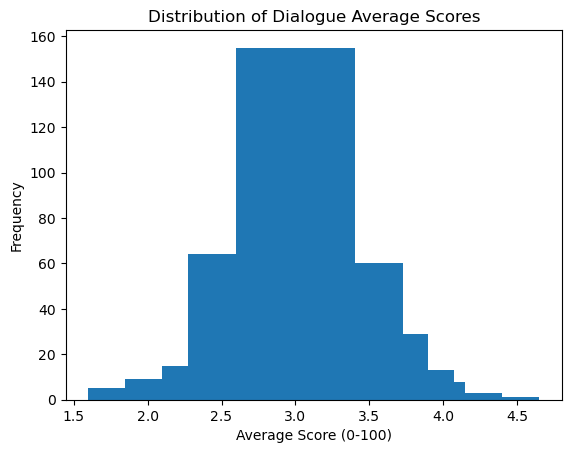

In [13]:
# visualize the distribution of score_list
import matplotlib.pyplot as plt

plt.bar(distribution.keys(), distribution.values())
plt.xlabel("Average Score (0-100)")
plt.ylabel("Frequency")
plt.title("Distribution of Dialogue Average Scores")
plt.show()

In [14]:
# each score get 1-2 dialogues
dialogue_dict = {}
for i in range(len(data['dialogues'])):
    score = data['dialogues'][i]['average_score']
    if score not in dialogue_dict:
        dialogue_dict[score] = []
    if len(dialogue_dict[score]) < 2:
        dialogue_dict[score].append(data['dialogues'][i])
        

In [15]:
len(dialogue_dict)

21

In [16]:
# convert dialogue_dict back to list of dialogues
dialogue_list = []
for score in dialogue_dict:
    for dialogue in dialogue_dict[score]:
        dialogue_list.append(dialogue)

In [17]:
# satistic of dialogue_list
statistic = {}
dialogue_id_list = []
for data in dialogue_list:
    statistic[data['dialogue_id']] = data['average_score']
    dialogue_id_list.append(data['dialogue_id'])
print(statistic)
print(dialogue_id_list)

{1: 3.0, 3: 3.0, 2: 3.25, 7: 3.25, 9: 3.33, 15: 3.33, 10: 3.67, 20: 3.67, 13: 3.5, 29: 3.5, 14: 3.75, 115: 3.75, 16: 2.75, 41: 2.75, 18: 2.25, 70: 2.25, 24: 3.6, 326: 3.6, 25: 4.0, 136: 4.0, 26: 2.0, 202: 2.0, 32: 2.8, 40: 2.8, 35: 2.67, 46: 2.67, 37: 2.4, 213: 2.4, 53: 2.2, 407: 2.2, 78: 3.2, 93: 3.2, 138: 3.4, 169: 3.4, 150: 2.5, 152: 2.5, 163: 2.6, 273: 2.6, 191: 2.33, 254: 2.33, 335: 4.25}
[1, 3, 2, 7, 9, 15, 10, 20, 13, 29, 14, 115, 16, 41, 18, 70, 24, 326, 25, 136, 26, 202, 32, 40, 35, 46, 37, 213, 53, 407, 78, 93, 138, 169, 150, 152, 163, 273, 191, 254, 335]


In [18]:
# save dialogue_list
with open("output/selected_dialogues.json", "w") as f:
    json.dump({"dialogues": dialogue_list}, f, indent=4)

# Prompting

In [2]:
import json

In [3]:
with open("output/selected_dialogues.json", "r") as f:
    data = json.load(f)
    print(data)

{'dialogues': [{'dialogue_id': 1, 'turns': [{'turn_id': 1, 'speaker': 'SYSTEM', 'text': 'Do you like movies like Thor?', 'intent': 'ENTITY_NAME+MOVIE_OR_SERIES', 'scores': None}, {'turn_id': 2, 'speaker': 'USER', 'text': "No, I don't like Thor.", 'intent': 'ENTITY_NAME+MOVIE_OR_SERIES', 'scores': [3, 2, 2]}, {'turn_id': 3, 'speaker': 'SYSTEM', 'text': 'Ok. What is it about this type of movie that you dislike?', 'intent': 'OTHER', 'scores': None}, {'turn_id': 4, 'speaker': 'USER', 'text': "I don't like all the", 'intent': 'OTHER', 'scores': [3, 2, 2]}, {'turn_id': 5, 'speaker': 'USER', 'text': "Like the I don't know. Like is it voice acting?", 'intent': 'OTHER', 'scores': [3, 2, 2]}, {'turn_id': 6, 'speaker': 'USER', 'text': 'in that controls the characters', 'intent': 'OTHER', 'scores': [3, 3, 2]}, {'turn_id': 7, 'speaker': 'SYSTEM', 'text': 'Can you say a little more about that please?', 'intent': 'OTHER', 'scores': None}, {'turn_id': 8, 'speaker': 'USER', 'text': "Yeah, so I don't kn

In [4]:
# data_sample is the data in barem so remove it in data
data_sample = []
data_inference = []

for dialogue in data['dialogues']:
    if (dialogue['dialogue_id'] in [335, 25, 26]):
        data_sample.append(dialogue)
    else:
        data_inference.append(dialogue)
        
print("Number of sample dialogues:", len(data_sample))
print("Number of inference dialogues:", len(data_inference))

Number of sample dialogues: 3
Number of inference dialogues: 38


In [5]:
import copy

def split_data_label(data):
    print(f"Split_data_label for {len(data)} records.")
    preprocess_dialogue_data = copy.deepcopy(data)

    # score each dialogue
    average_scores = []
    average_score_100 = []
    overall_scores = []
    for dialogue in preprocess_dialogue_data:
        average_scores.append({"dialogue_id": dialogue['dialogue_id'], "average_scores": dialogue['average_score']})
        average_score_100.append({"dialogue_id": dialogue['dialogue_id'], "average_score_100": dialogue['average_score_100']})
        overall_scores.append({"dialogue_id": dialogue['dialogue_id'], "overall_scores": dialogue['overall_scores']})

    # Preprocess into data and label (scores)
    
    for dialogue in preprocess_dialogue_data:
        for turn in dialogue['turns']:
            # remove the "scores" field
            if 'scores' in turn:
                del turn['scores']
            if 'intent' in turn:
                del turn['intent']
        # if 'overall_scores' in dialogue:
        #     del dialogue['overall_scores']
        # if 'average_score' in dialogue:
        #     del dialogue['average_score']
        # if 'average_score_100' in dialogue:
        #     del dialogue['average_score_100']
            
    data_inference = []
    for dialogue in preprocess_dialogue_data:
        dialogue_text = ""
        for turn in dialogue['turns']:
            dialogue_text += turn['speaker'] + ": " + turn['text'] + "\n"
        data_inference.append({"dialogue_id": dialogue['dialogue_id'], "text": dialogue_text})
        
    return data_inference, average_scores, average_score_100, overall_scores

In [6]:
data_inference, average_scores, average_score_100, overall_scores = split_data_label(data_inference)

Split_data_label for 38 records.


In [7]:
data_inference

[{'dialogue_id': 1,
  'text': "SYSTEM: Do you like movies like Thor?\nUSER: No, I don't like Thor.\nSYSTEM: Ok. What is it about this type of movie that you dislike?\nUSER: I don't like all the\nUSER: Like the I don't know. Like is it voice acting?\nUSER: in that controls the characters\nSYSTEM: Can you say a little more about that please?\nUSER: Yeah, so I don't know I guess the acting was bad.\nUSER: I was wondering if it's voice acting that controls the You wouldn't know.\nSYSTEM: Do you like movies like Star Wars?\nUSER: Yeah, I liked the first Star Wars but I haven't seen I haven't seen any of them since that first one.\nUSER: Yeah, I liked the first one.\nSYSTEM: Ok. What is it about this type of movie that you like?\nUSER: It had a good sound track.\nUSER: The acting was good. It was a good story.\nSYSTEM: Can you say a little more about that please?\nUSER: What do you want to know about it?\nSYSTEM: anything else that you like about that movie any other details\nUSER: Yeah I li

In [ ]:

for dialogue in data['dialogues']:
    # print(f"dialogue_id={dialogue['dialogue_id']}")

    dialogue_text = ""
    for turn in dialogue['turns']:
        dialogue_text += turn['speaker'] + ": " + turn['text'] + "\n"

In [112]:
dialogue_text

"SYSTEM: Can you tell me what types of movies you like?\nUSER: I really like comedies.\nSYSTEM: ok, why do you like comedies?\nUSER: I like to laugh. I like the lightheartedness of it, you know, nothing too serious, a true escape from everyday life. And just puts you in a good mood, and that's how I would prefer to be.\nSYSTEM: got it, can you name a specific movie you really liked?\nUSER: Sure, Best in Show is one of my absolute favorites.\nSYSTEM: ok, why do you like that movie?\nUSER: Oh gosh. It's like I'ts perfect. It's a mockumentary style film and they are mocking the dog show world. So, the dog show world that they show is like a carbon copy of the real thing because it's inherently funny, so they don't have to really max with it. And a lot of the player they it there's a script for the movie but it's also ad libed.\nUSER: It's just hilarious. It's so original.\nUSER: So much, so different, and just so funny. It makes you laugh every time you watch it.\nSYSTEM: ok, would you sa

In [ ]:
for turn in data['turns']:
    print(turn['speaker'] + ": " + turn['text'])

In [34]:
import json

# Giả định đây là phần dữ liệu 'dialogues' đã được load từ input của bạn
dialogues_data = [
    {'dialogue_id': 1, 'turns': [
        {'turn_id': 1, 'speaker': 'SYSTEM', 'text': 'Do you like movies like Thor?'},
        {'turn_id': 2, 'speaker': 'USER', 'text': "No, I don't like Thor."},
        {'turn_id': 3, 'speaker': 'SYSTEM', 'text': 'Ok. What is it about this type of movie that you dislike?'},
        {'turn_id': 4, 'speaker': 'USER', 'text': "I don't like all the"},
        # Thêm các lượt lời khác của Dialogue 1 vào đây...
        {'turn_id': 31, 'speaker': 'USER', 'text': 'All right. You too.'}
    ]},
    {'dialogue_id': 3, 'turns': [
        {'turn_id': 1, 'speaker': 'SYSTEM', 'text': 'What kind of movies do you like?'},
        {'turn_id': 2, 'speaker': 'USER', 'text': 'I like romantic comedies.'},
        # Thêm các lượt lời khác của Dialogue 3 vào đây...
    ]},
    # ... và các đoạn hội thoại khác
]

# Biến để lưu trữ toàn bộ nội dung đã nối
full_dialogue_text = ""

# Lặp qua từng đoạn hội thoại (dialogue)
for dialogue in dialogues_data:
    dialogue_text = ""
    
    # Lặp qua từng lượt lời (turn) trong đoạn hội thoại
    for turn in dialogue['turns']:
        speaker = turn['speaker']
        text = turn['text']
        
        # Nối speaker và text theo định dạng mong muốn, sau đó thêm vào chuỗi
        dialogue_text += f"{speaker}: {text}"
        
    # Thêm toàn bộ nội dung của đoạn hội thoại hiện tại vào biến chính
    # Thêm dấu xuống dòng hoặc ký tự phân cách rõ ràng nếu bạn muốn phân biệt giữa các dialogue
    full_dialogue_text += dialogue_text 
    
    # Để phân biệt giữa các dialogue, bạn có thể thêm một ký tự đặc biệt, ví dụ: "\n---DIALOGUE END---\n"
    # Trong ví dụ này, tôi chỉ nối liền mạch như format bạn muốn
    
# In ra kết quả (Chỉ in vài ký tự đầu để tránh quá dài)
print(f"Toàn bộ dữ liệu được lưu trong biến 'full_dialogue_text' (chỉ hiển thị 300 ký tự đầu):")
print("-" * 70)
print(full_dialogue_text[:300]) 

print("\n")
print(f"Tổng chiều dài của chuỗi đã nối: {len(full_dialogue_text)} ký tự")

Toàn bộ dữ liệu được lưu trong biến 'full_dialogue_text' (chỉ hiển thị 300 ký tự đầu):
----------------------------------------------------------------------
SYSTEM: Do you like movies like Thor?USER: No, I don't like Thor.SYSTEM: Ok. What is it about this type of movie that you dislike?USER: I don't like all theUSER: All right. You too.SYSTEM: What kind of movies do you like?USER: I like romantic comedies.


Tổng chiều dài của chuỗi đã nối: 252 ký tự


In [35]:
dialogue_text

'SYSTEM: What kind of movies do you like?USER: I like romantic comedies.'

# CoT

Chain-of-Thought Prompting: 
https://www.datacamp.com/tutorial/chain-of-thought-prompting?utm_cid=19589720824&utm_aid=157098106775&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-apac_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&utm_loc=9197905-&utm_mtd=-c&utm_kw=&utm_source=google&utm_medium=paid_search&utm_content=ps-other~apac-en~dsa~tofu~tutorial-artificial-intelligence&gad_source=1&gad_campaignid=19589720824&gbraid=0AAAAADQ9WsGNlmCHQGVIVqTjtwg5qZEDs&gclid=Cj0KCQjw9JLHBhC-ARIsAK4PhcoL4HW2EJhhzP9pQikd97JcZ0ZS629FqUaJKW1-365Dg2WO_r_M6HUaAvK6EALw_wcB

In [ ]:
prompt = f"""
Give me a numbered list of all coffee-related words in English from the text below:
The task requires the following actions:
1 - Translate the given text into English.
2 - List each coffee-related word from the English text.
Text: <{input_text}>

Let's think step by step.
"""
response = chatgpt_call(prompt)
print(response)

# Evaluate

In [15]:
import pandas as pd
df = pd.DataFrame(average_scores)

In [16]:
result = [{'dialogue_id': 1, 'average_score_100': 50.5, 'model_score': 35},
 {'dialogue_id': 3, 'average_score_100': 50.5, 'model_score': 38},
 {'dialogue_id': 2, 'average_score_100': 56.69, 'model_score': 62},
 {'dialogue_id': 7, 'average_score_100': 56.69, 'model_score': 64},
 {'dialogue_id': 9, 'average_score_100': 58.75, 'model_score': None},
 {'dialogue_id': 15, 'average_score_100': 58.75, 'model_score': 18},
 {'dialogue_id': 10, 'average_score_100': 67.0, 'model_score': 68},
 {'dialogue_id': 20, 'average_score_100': 67.0, 'model_score': 48},
 {'dialogue_id': 13, 'average_score_100': 62.88, 'model_score': 54},
 {'dialogue_id': 29, 'average_score_100': 62.88, 'model_score': None},
 {'dialogue_id': 14, 'average_score_100': 69.06, 'model_score': 79},
 {'dialogue_id': 115, 'average_score_100': 69.06, 'model_score': 34},
 {'dialogue_id': 16, 'average_score_100': 44.31, 'model_score': 68},
 {'dialogue_id': 41, 'average_score_100': 44.31, 'model_score': 68},
 {'dialogue_id': 18, 'average_score_100': 31.94, 'model_score': 38},
 {'dialogue_id': 70, 'average_score_100': 31.94, 'model_score': None},
 {'dialogue_id': 24, 'average_score_100': 65.35, 'model_score': 28},
 {'dialogue_id': 326, 'average_score_100': 65.35, 'model_score': 55},
 {'dialogue_id': 136, 'average_score_100': 75.25, 'model_score': 18},
 {'dialogue_id': 202, 'average_score_100': 25.75, 'model_score': None},
 {'dialogue_id': 32, 'average_score_100': 45.55},
 {'dialogue_id': 40, 'average_score_100': 45.55},
 {'dialogue_id': 35, 'average_score_100': 42.25},
 {'dialogue_id': 46, 'average_score_100': 42.25},
 {'dialogue_id': 37, 'average_score_100': 35.65},
 {'dialogue_id': 213, 'average_score_100': 35.65},
 {'dialogue_id': 53, 'average_score_100': 30.7},
 {'dialogue_id': 407, 'average_score_100': 30.7},
 {'dialogue_id': 78, 'average_score_100': 55.45},
 {'dialogue_id': 93, 'average_score_100': 55.45},
 {'dialogue_id': 138, 'average_score_100': 60.4},
 {'dialogue_id': 169, 'average_score_100': 60.4},
 {'dialogue_id': 150, 'average_score_100': 38.12},
 {'dialogue_id': 152, 'average_score_100': 38.12},
 {'dialogue_id': 163, 'average_score_100': 40.6},
 {'dialogue_id': 273, 'average_score_100': 40.6},
 {'dialogue_id': 191, 'average_score_100': 34.0},
 {'dialogue_id': 254, 'average_score_100': 34.0}
 ]

In [17]:
result_df = pd.DataFrame(result)

In [19]:
result_df = result_df.join(df, on='dialogue_id', lsuffix='_left', rsuffix='_right')

In [ ]:
result_df = result_df[['dialogue_id', 'average_scores', 'model_score']]
result_df['model_score_5'] = result_df['model_score'] / 20
result_df.drop(columns=['model_score'], inplace=True)

In [59]:
metrics_list = []

In [63]:
metrics =calculate_all_metrics(result_df['average_scores'], result_df['model_score_5'])
metrics_list.append(metrics)

In [56]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_all_metrics(y_true, y_pred):
    """
    Calculates MAE, MSE, RMSE, and R-squared and returns them in a dictionary.
    """
    mae = round(mean_absolute_error(y_true, y_pred), 4)
    mse = round(mean_squared_error(y_true, y_pred), 4)
    rmse = float(round(np.sqrt(mse), 4))
    r2 = round(r2_score(y_true, y_pred), 4)
    
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    return metrics

In [74]:
all_results = {
    'mean': {
    'MAE': float(np.mean([m['MAE'] for m in metrics_list])),
    'MSE': float(np.mean([m['MSE'] for m in metrics_list])),
    'RMSE': float(np.mean([m['RMSE'] for m in metrics_list])),
    'R2': float(np.mean([m['R2'] for m in metrics_list])),
    },
    'sd' :{
    'MAE': float(np.std([m['MAE'] for m in metrics_list])),
    'MSE': float(np.std([m['MSE'] for m in metrics_list])),
    'RMSE': float(np.std([m['RMSE'] for m in metrics_list])),
    'R2': float(np.std([m['R2'] for m in metrics_list])),
    }
}

In [75]:
all_results

{'mean': {'MAE': 0.8642, 'MSE': 1.173, 'RMSE': 1.0831, 'R2': -2.5142},
 'sd': {'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0, 'R2': 0.0}}